In [22]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from matplotlib import  font_manager, rc

In [23]:
import chardet
rawdata = open("Traffic_Accident_2017.csv", 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
charenc

'EUC-KR'

In [24]:
df = pd.read_csv("Traffic_Accident_2017.csv", encoding = "EUC-KR", index_col="발생년")
df.head(5)

,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
발생년,,,,,,,,,,,,,,,,,,,,,
2017,2017010101,15,야간,일,1,2,1,0,0,전남,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
2017,2017010102,28,야간,일,1,1,0,0,0,서울,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2017,2017010102,43,야간,일,1,2,0,1,0,충남,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
2017,2017010102,22,야간,일,1,1,0,0,0,충남,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
2017,2017010104,37,야간,일,1,1,0,0,0,서울,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946


### 요일별로 사고건수 세기

In [25]:
temp = df.요일.value_counts()
temp

화    608
월    603
금    603
토    596
목    586
수    565
일    504
Name: 요일, dtype: int64

### temp를 요일순으로 정렬하기

In [26]:
x = ["월", "화", "수", "목", "금", "토", "일"]
y = temp[x]
y

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

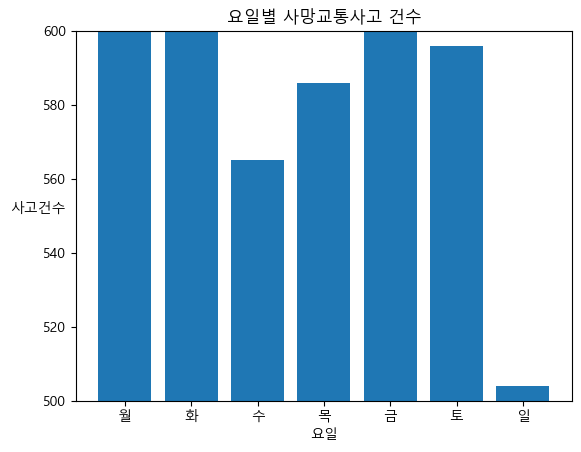

In [27]:
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family = font_name)

plt.bar(x, y)
plt.xlabel("요일")
plt.ylabel("사고건수").set_rotation(360)

plt.title("요일별 사망교통사고 건수")

plt.ylim(500, 600)
# plt.figsize(5,5)
plt.show()

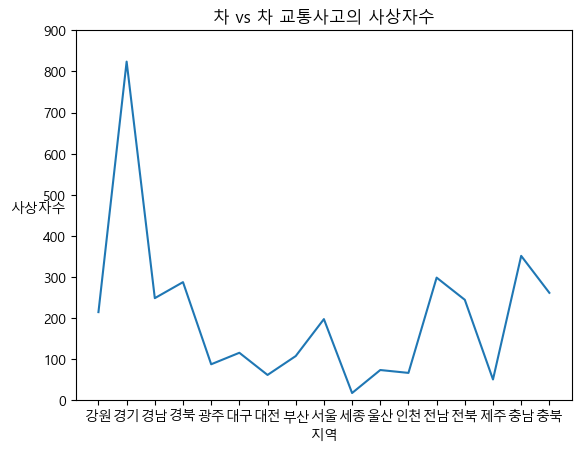

<Figure size 1000x1000 with 0 Axes>

In [57]:
carTOcar = df[df.사고유형_대분류 == "차대차"]

#발생지시도 기준으로 사상자수 합계 구하기
p = carTOcar[["사상자수", "발생지시도"]].groupby("발생지시도").sum()

plt.plot(p.index, p.사상자수)

plt.xlabel("지역")
plt.ylabel("사상자수").set_rotation(360)

plt.title("차 vs 차 교통사고의 사상자수")

plt.ylim(0, 900)

plt.figure(figsize=(10,10)) #그래프 사이즈

plt.show()

In [29]:
df[df.index == 2017]

,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
발생년,,,,,,,,,,,,,,,,,,,,,
2017,2017010101,15,야간,일,1,2,1,0,0,전남,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
2017,2017010102,28,야간,일,1,1,0,0,0,서울,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2017,2017010102,43,야간,일,1,2,0,1,0,충남,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
2017,2017010102,22,야간,일,1,1,0,0,0,충남,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
2017,2017010104,37,야간,일,1,1,0,0,0,서울,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,2017123118,10,야간,일,1,4,1,0,2,경남,...,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774
2017,2017123118,25,야간,일,1,1,0,0,0,부산,...,단일로,기타단일로,원동기장치자전거,원동기장치자전거,없음,없음,1160683,1704380,129.267745,35.322087
2017,2017123119,55,야간,일,1,1,0,0,0,강원,...,단일로,기타단일로,화물차,화물차,없음,없음,1067639,1980346,128.268522,37.820351


In [30]:


plt.show()